# Parte 2 

Generación de Flujos de Caja Aleatorios:  Usaremos la librería numpy para generar flujos de caja aleatorios.  

Análisis de Sensibilidad: Usaremos la librería SALib para llevar a cabo el análisis de sensibilidad con índices Sobol.  

Visualización: Utilizaremos matplotlib para visualizar los resultados.

In [2]:
import numpy as np
from SALib.sample import saltelli
from SALib.analyze import sobol
import matplotlib.pyplot as plt

# Definición de los parámetros
problem = {
    'num_vars': 2,
    'names': ['Tasa de Interés', 'Volatilidad'],
    'bounds': [[0.08, 0.12], [0.15, 0.25]]
}


C:\Users\angel\AppData\Local\Temp\ipykernel_7652\564789373.py:21: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1000)
c:\Users\angel\Proyectos\VIII\MODSIM\Corto2_ModSim\cortoMS\Lib\site-packages\SALib\sample\saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


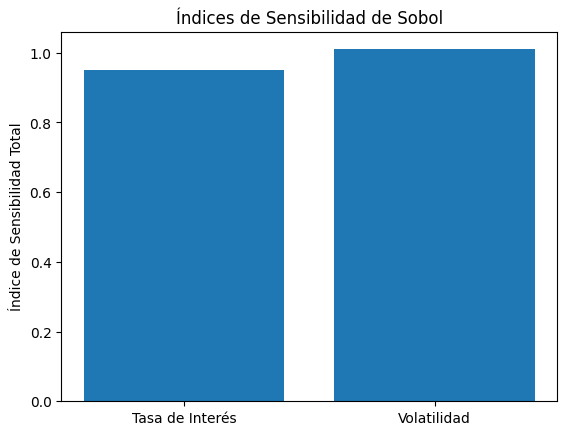

In [3]:
# Función de simulación de VAN
def simulate_van(params):
    n_simulations = 1000
    horizon = 5
    discount_rate = 0.1
    cash_flows_mean = 500000
    cash_flows_std_dev = 100000
    
    interest_rate, volatility = params
    
    net_present_values = []
    for _ in range(n_simulations):
        cash_flows = np.random.normal(cash_flows_mean, cash_flows_std_dev, horizon)
        discounted_cash_flows = cash_flows / ((1 + discount_rate) ** np.arange(1, horizon + 1))
        net_present_value = np.sum(discounted_cash_flows)
        net_present_values.append(net_present_value)
    
    return np.mean(net_present_values)

# Generación de muestras
param_values = saltelli.sample(problem, 1000)

# Ejecución de la simulación
Y = np.array([simulate_van(params) for params in param_values])

# Análisis de sensibilidad utilizando índices Sobol
Si = sobol.analyze(problem, Y)

# Visualización
plt.bar(range(len(Si['ST'])), Si['ST'], tick_label=problem['names'])
plt.title('Índices de Sensibilidad de Sobol')
plt.ylabel('Índice de Sensibilidad Total')
plt.show()